# PyTorch

Tensor is basically an MD array

In [1]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)
x.shape

ModuleNotFoundError: No module named 'torch'

In [7]:
x = torch.zeros([2,5])
print(x)
x.shape

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


torch.Size([2, 5])

In [21]:
x = torch.eye(3,4)
print(x)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])


In [15]:
x = torch.rand([2,5])
x.view([1,10]) #view flattens, reshapes the tensor
print(x)

tensor([[0.4630, 0.4810, 0.1878, 0.7571, 0.2356],
        [0.9163, 0.6695, 0.5935, 0.0710, 0.3576]])


Even after "reshaping", flattening to 1x10 array, x has not beeen changed, we need to reassign


In [16]:
X = x.view([1,10])
print(X)

tensor([[0.4630, 0.4810, 0.1878, 0.7571, 0.2356, 0.9163, 0.6695, 0.5935, 0.0710,
         0.3576]])


# Our First Deep Model Network
First, we need a dataset.

We're just going to use data from Pytorch's "torchvision." Pytorch has a relatively handy inclusion of a bunch of different datasets, including many for vision tasks, which is what torchvision is for.

We're going to first start off by using Torchvision because you should know it exists, plus it alleviates us the headache of dealing with datasets from scratch.

For now though, we're just trying to learn about how to do a basic neural network in pytorch, so we'll use torchvision here, to load the MNIST dataset, which is a image-based dataset showing handwritten digits from 0-9, and your job is to write a neural network to classify them.

To begin, let's make our imports and load in the data:

In [22]:
import torch
import torchvision
from torchvision import transforms, datasets
train = datasets.MNIST('',train=True,download=False,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('',train=False,download=False,
                      transform = transforms.Compose([transforms.ToTensor()]))

Above, we're just loading in the dataset, shuffling it, and applying any transforms/pre-processing to a tensor object

Next, we need to handle for how we're going to iterate over that dataset:

## Training and Testing data split
To train any machine learning model, we want to first off have training and validation datasets. This is so we can use data that the machine has never seen before to "test" the machine.

## Shuffling
Then, within our training dataset, we generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the machine off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the machine would probably just classify everything as the last thing you trained on. If you shuffle the data, your machine is much more likely to figure out what's what.

## Scaling and normalization
Another consideration at some point in the pipeline is usually scaling/normalization of the dataset. In general, we want all input data to be between zero and one. Often many datasets will contain data in ranges that are not within this range, and we generally will want to come up with a way to scale the data to be within this range.

For example, an image is comprised of pixel values, most often in the range of 0 to 255. To scale image data, you usually just divide by 255. That's it.

## Batches
Once you've done all this, you then want to pass your training dataset to your neural network.

Not so fast!

There are two major reasons why you can't just go and pass your entire dataset at once to your neural network:

Neural networks shine and outperform other machine learning techniques because of how well they work on big datasets. Gigabytes. Terabytes. Petabytes! 

When we're just learning, we tend to play with datasets smaller than a gigabyte, and we can often just toss the entire thing into the VRAM of our GPU or even more likely into RAM.

Unfortunately, in practice, you would likely not get away with this.

The aim with neural networks is to have the network generalize with the data. We want the neural network to actually learn general principles. That said, neural networks often have millions, or tens of millions, of parameters that they can tweak to do this. This means neural networks can also just memorize things. While we hope neural networks will generalize, they often learn to just memorize the input data. Our job as the scientist is to make it as hard as possible for the neural network to just memorize.
This is another reason why we often track "in sample" validation acccuracy and "out of sample" validation accuracy. If these two numbers are similar, this is good. As they start to diverge (in sample usually goes up considerably while out of sample stays the same or drops), this usually means your neural network is starting to just memorize things.

One way we can help the neural network to not memorize is, at any given time, we feed only some specific batch size of data. This is often something between 8 and 64.

This batching helps because, with each batch, the neural network does a back propagation for new, updated weights with hopes of decreasing that loss.

With one giant passing of your data, this would include neuron changes that had nothing to do with general principles and were just brute forcing the operation.

By passing many batches, each with their own gradient calcs, loss, and backprop, this means each time the neural network optimizes things, it will sort of "keep" the changes that were actually useful, and erode the ones that were just basically memorizing the input data.

Given a large enough neural network, however, even with batches, your network can still just simply memorize.

This is also why we often try to make the smallest neural network as possible, so long as it still appears to be learning. In general, this will be a more successful model long term.

Now what?

Well, we have our data, but what is it really? How do we work with it? We can iterate over our data like so:

In [23]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

for data in trainset:
    print(data)
    break
    
#iterating over the datasets, break to show one dataset of 10 digits
#0th index is a tensor object containing a tensor of tensor which is the images
#1st index is a tensor object which is the labels for the numbers themselves

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Let us take a look at one:


In [25]:
X, y = data[0][4], data[1][4]
print(X,y)
print(data[0][0].shape)
#take note the tensor object shape, has a 0th index of 1

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

As you can see, data[1] is just a bunch of labels. So, since data[1][4] is a 9, we can expect data[0][4] to be an image of a 9. Let's see!

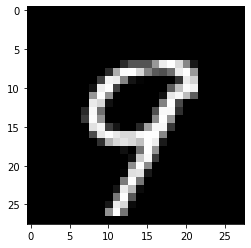

In [29]:
import matplotlib.pyplot as plt
plt.imshow(data[0][4].view(28,28),cmap = 'gray')
plt.show()

## So, for our checklist:

We've got our data of various featuresets and their respective classes.
That data is all numerical.
We've shuffled the data.
We've split the data into training and testing groups.
Is the data scaled?
Is the data balanced?
Looks like we have a couple more questions to answer. First off is it scaled? Remember earlier I warned that the neural network likes data to be scaled between 0 and 1 or -1 and 1. Raw imagery data is usually RGB, where each pixel is a tuple of values of 0-255, which is a problem. 0 to 255 is not scaled. How about our dataset here? Is it 0-255? or is it scaled already for us? Let's check out some lines:
```python
data[0][0][0][0] =
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
```

Hmm, it's empty. Makes sense, the first few rows are blank probably in a lot of images. The 2 up above certainly is.

```python
data[0][0][0][3] =
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0118, 0.4157, 0.9059, 0.9961, 0.9216, 0.5647, 0.1882, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
```

Ah okay, there we go, we can clearly see that... yep this image data is actually already scaled for us.... in the real world, it wont be.

Like I said: Cheating! Hah. Alright. One more question: Is the data balanced?

## What is data balancing?

Recall before how I explained that if we don't shuffle our data, the machine will learn things like what the last few hundred classes were in a row, and probably just predict that from there on out.

Well, with data balancing, a similar thing could occur.

Imagine you have a dataset of cats and dogs. 7200 images are dogs, and 1800 are cats. This is quite the imbalance. The classifier is highly likely to find out that it can very quickly and easily get to a 72% accuracy by simple always predicting dog. It is highly unlikely that the model will recover from something like this.

Other times, the imbalance isn't quite as severe, but still enough to make the model almost always predict a certain way except in the most obvious-to-it-of cases. Anyway, it's best if we can balance the dataset.

By "balance," I mean make sure there are the same number of examples for each classifications in training.

Sometimes, this simply isn't possible. There are ways for us to handle for this with special class weighting for the optimizer to take note of, but, even this doesn't always work. Personally, I've never had success with this in any real world application.

In our case, how might we confirm the balance of data? Well, we just need to iterate over everything and make a count. Pretty simple:

In [31]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, Ys = data
    for labels in Ys:
        counter_dict[int(labels)] += 1
        total += 1
        
#percentage conversion
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")
        
print(counter_dict)

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


# Creating a Nureal Network
The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). For now, we've only spoken about fully-connected layers, so we will just be using those for now.

The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. Instead of writing all of the code for these things, we can just import them, since these are things everyone will be needing in their deep learning code.

To make our model, we're going to create a class. We'll call this class net and this net will inhereit from the nn.Module class

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        #inorder to inherit the __init__ of the parent module, hence need super
        #define the fully connected layers to the network
        self.fc1 = nn.Linear(784, 64) 
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

All we're doing is just defining values for some layers, we're calling them fc1, fc2...etc, but you could call them whatever you wanted. The fc just stands for fully connected. Fully connected refers to the point that every neuron in this layer is going to be fully connected to attaching neurons. Nothing fancy going on here! Recall, each "connection" comes with weights and possibly biases, so each connection is a "parameter" for the neural network to play with.

In our case, we have 4 layers. Each of our nn.Linear layers expects the first parameter to be the input size, and the 2nd parameter is the output size.

So, our first layer takes in 28x28, because our images are 28x28 images of hand-drawn digits. A basic neural network is going to expect to have a flattened array, so not a 28x28, but instead a 1x784.

Then this outputs 64 connections. This means the next layer, fc2 takes in 64 (the next layer is always going to accept however many connections the previous layer outputs). From here, this layer ouputs 64, then fc3 just does the same thing.

fc4 takes in 64, but outputs 10. Why 10? Our "output" layer needs 10 neurons for the 10 labels for each digit

Now, that's great, we have those layers, but nothing really dictating how they interact with eachother, they're just simply defined.

The simplest neural network is fully connected, and feed-forward, meaning we go from input to output. In one side and out the other in a "forward" manner. We do not have to do this, but, for this model, we will. So let's define a new method for this network called forward and then dictate how our data will pass through this model:

In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.fc1 = nn.Linear(784, 64) 
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

Notice the x is a parameter for the forward method. This will be our input data. As you can see, we literally just "pass" this data through the layers. This could in theory learn with some problems, but this is going to most likely cause some serious explosions in values. The neural network could control this, but probably wont. Instead, what we're missing is an activation function for the layers.

Recall that we're mimicking brain neurons that either are firing, or not. We use activation functions to take the sum of the input data * weights, and then to determine if the neuron is firing or not.

Currently, the most popular is the rectified linear, or relu, activation function.Basically, these activation functions are keeping our data scaled between 0 and 1.

Finally, for the output layer, we're going to use softmax. Softmax makes sense to use for a multi-class problem, where each thing can only be one class or the other. This means the outputs themselves are a confidence score, adding up to 1.

In [39]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.fc1 = nn.Linear(784, 64) 
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = self.fc4(x) 
        #just know, in here, we can add logic actually, elif statements
        
        return F.log_softmax(x, dim=1) 
        #the output layer is always flat, hence the dim is 1 to apply softmax
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


For example, a fake random image to pass through our above network

```python
X = torch.rand((28,28))
X = X.view(-1,28*28)
output = net(X)
print(output)

tensor([[-2.2013, -2.2527, -2.3993, -2.1844, -2.2089, -2.4535, -2.4743, -2.2409,
         -2.3953, -2.2698]], grad_fn=<LogSoftmaxBackward>)
```

Why the leading -1?
Any input and output to our neural network is expected to be a group feature sets. Even if you intend to just pass 1 set of features, you still have to pass it as a "list" of features.

In our case, we really just want a 1x784, and we could say that, but you will more often is -1 used in these shapings. Why? -1 suggests "any size". So it could be 1, 12, 92, 15295...etc. It's a handy way for that bit to be variable. In this case, the variable part is how many "samples" we'll pass through.

# Training our Neural Network¶


Next, we want to calculate loss and specify our optimizer:

Our loss_function is what calculates "how far off" our classifications are from reality. 

In terms of a machine learning by tweaking lots of little parameters to slowly get closer and closer to fitting, it definitely matters how wrong things are.

For this, we use loss, which is a measurement of how far off the neural network is from the targeted output. There are a few types of loss calculations. A popular one is mean squared error, but we're trying to use these scalar-valued classes.

In general, you're going to have two types of classes. One will just be a scalar value, the other is what's called a one_hot array/vector.

In our case, a zero might be classified as:
```python 
0 or [1, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0]
```
The latter is a one_hot array where quite literally one element only is a 1 and the rest are zero. The index that is hot is the classification.

A one_hot vector for a a 3 would be:
```python
[0, 0, 0, 1, 0, 0, 0 ,0 ,0 ,0]
```
I tend to use one_hot, but this data is specifying a scalar class, so 0, or 1, or 2...and so on.

Depending on what your targets look like, you will need a specific loss.

For one_hot vectors, I tend to use mean squared error.
For these scalar classifications, I use cross entropy.

Next, we have our optimizer. This is the thing that adjusts our model's adjustable parameters like the weights, to slowly, over time, fit our data. I am going to have us using Adam, which is Adaptive Momentum. This is the standard go-to optimizer usually. There's a new one called rectified adam that is gaining steam. I haven't had the chance yet to make use of that in any project, and I do not think it's available as just an importable function in Pytorch yet, but keep your eyes peeled for it! For now, Adam will do just fine I'm sure. 

The other thing here is lr, which is the learning rate. A good number to start with here is 0.001 or 1e-3. The learning rate dictates the magnitude of changes that the optimizer can make at a time. Thus, the larger the LR, the quicker the model can learn, but also you might find that the steps you allow the optimizer to make are actually too big and the optimizer gets stuck bouncing around rather than improving. Too small, and the model can take much longer to learn as well as also possibly getting stuck.

Imagine the learning rate as the "size of steps" that the optimizer can take as it searches for the bottom of a mountain, where the path to the bottom isn't necessarily a simple straight path down.

For simpler tasks, a learning rate of 0.001 usually is more than fine. For more complex tasks, you will see a learning rate with what's called a decay. Basically you start the learning rate at something like 0.001, or 0.01...etc, and then over time, that learning rate gets smaller and smaller. The idea being you can initially train fast, and slowly take smaller steps, hopefully getthing the best of both worlds:

Now we can iterate over our data. In general, you will make more than just 1 pass through your entire training dataset.

Each full pass through your dataset is referred to as an epoch. In general, you will probably have somewhere between 3 and 10 epochs, but there's no hard rule here.

Too few epochs, and your model wont learn everything it could have.
Too many epochs and your model will over fit to your in-sample data (basically memorize the in-sample data, and perform poorly on out of sample data).

Let's go with 3 epochs for now. So we will loop over epochs, and each epoch will loop over our data. Something like:

In [42]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) 
#net.parameters corresponds to everything that is adjustable in our model
# 1st parameter is what you want to be adjusted by the model

EPOCHS = 3

for epoch in range(3): 
    for data in trainset:  
        X, y = data  
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch 
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss) 

tensor(0.0083, grad_fn=<NllLossBackward>)
tensor(0.0095, grad_fn=<NllLossBackward>)
tensor(0.0289, grad_fn=<NllLossBackward>)


Every line here is commented, but the concept of gradients might not be clear. Once we pass data through our neural network, getting an output, we can compare that output to the desired output. With this, we can compute the gradients for each parameter, which our optimizer (Adam, SGD...etc) uses as information for updating weights.

This is why it's important to do a net.zero_grad() for every step, otherwise these gradients will add up for every pass, and then we'll be re-optimizing for previous gradients that we already optimized for. There could be times when you intend to have the gradients sum per pass, like maybe you have a batch of 10, but you want to optimize per 50 or something. I don't think people really do that, but the idea of Pytorch is to let you do whatever you want.

So, for each epoch, and for each batch in our dataset, what do we do?

Grab the features (X) and labels (y) from current batch
Zero the gradients (net.zero_grad)
Pass the data through the network
Calculate the loss
Adjust weights in the network with the hopes of decreasing loss
As we iterate, we get loss, which is an important metric, but we care about accuracy. So, how did we do? To test this, all we need to do is iterate over our test set, measuring for correctness by comparing output to target values.

In [49]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        #our model output is an argmax, our target is a scalar value
        for idx, j in enumerate(output):
            if torch.argmax(j) == y[idx]:
                correct += 1
            total += 1
print('Accuracy:', round(correct/total,3))

Accuracy: 0.979


Now lets visualize the comparison


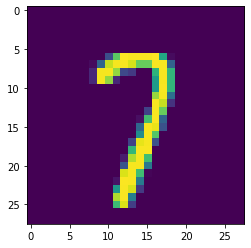

tensor([[-1.5413e+01, -9.9509e+00, -8.3054e+00, -7.2985e+00, -1.2345e+01,
         -1.6147e+01, -2.7814e+01, -1.0405e-03, -1.2696e+01, -9.7076e+00]],
       grad_fn=<LogSoftmaxBackward>)
tensor(7, grad_fn=<NotImplemented>)


In [51]:
import matplotlib.pyplot as plt
plt.imshow(X[4].view(28,28))
plt.show()

print(net(X[4].view(-1,784)))
print(torch.argmax(net(X[4].view(-1,784))[0]))

# Convulsional Network
Convulsional -> Pooling -> Basically it is simplifying the image by looking for features of the image -> layering them until it is a basic feature

Now that we've learned about the basic feed forward, fully connected, neural network, it's time to cover a new one: the convolutional neural network, often referred to as a convnet or cnn.

For the purposes of this tutorial, assume each square is a pixel. Next, for the convolution step, we're going to take some n-sized window:

Those features are then condensed down into a single feature in a new featuremap.

Next, we slide that window over and repeat until with have a new set of featuremaps.

You continue this process until you've covered the entire image.
From here, we do pooling. Now we'll take a 3x3 pooling window:
The most common form of pooling is "max pooling," where we simple take the maximum value in the window, and that becomes the new value for that region.

Often, after convolutional layers, we'll have 1 or a few fully connected layers, and then the output. You could go straight from the final pooling to an output layer, however.

So, at their core, convnets are hunting first for low level types of features like lines and curves, then they look for combinations of those, and so on, to better understand what they're looking at.

Let's try our hands at a convnet example.

# Preparing data
To begin, we need a dataset.
I am going to have us use the Cats vs Dogs dataset.

This dataset consists of a bunch of images of cats and dogs. Different breeds, ages, sizes (both the animal and the image)..etc.

Once you have downloaded the dataset, you need to extract it. I would just extract it to the directory that you're working in

Remember how before I said using torchvision was cheating? Well it was, and now we have to build this data ourselves! To begin, let's make sure you have all of the required libraries.

The IMG_SIZE is whatever we want, but we have to pick something. The images in the training data are all varying sizes and shapes. We're going to normalize all of the images by reshaping them to all be the same size. I will go with 50x50.

Next are just some variables that hold where the directories with the data are. Once extracted, you wind up with 2 directories. One is Cat, the other is Dog and those contain a bunch of images.

We want to iterate through these two directories, grab the images, resize, scale, convert the class to number (cats = 0, dogs = 1), and add them to our training_data.

Continuing along in our class, let's make a new method called make_training_data:
```python
import os
import cv2
import numpy as np
from tqdm import tqdm

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    
    def make_training_data(self):
        for label in self.LABELS:
        #iterating over the classvariable dictionary keys, which are directory of the main folder to the images Cats & Dogs
            for file in tqdm(os.listdir(label)):
            #now the iterating the images in the directory, file is the image file name itself, os.listdir returns all files
                if 'jpg' in file:
                    try:
                        pass
                    except Exception as e:
                        pass
                        #print(label, f, str(e))                    
                    ```
                    
All we're doing so far is iterating through the cats and dogs directories, and looking through all of the images. Now let's actually write the code to handle for the images.

We read in the data, convert to grayscale, resize the image to whatever we chose, and then append the image data along with the associated class in number form to our training_data. Some images can't be read, so we just pass on the exception. If you're creating no data at all, then go ahead and print out the error, but it's enough images to be annoying if I print out the error every time.

Once we have the data, is there anything we've not done to the data yet?

We want to check for balance, and we want to shuffle it. We can just use a counter again to see balance:
```python
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                        ```
Then we can just shuffle the training_data list at the end with
np.random.shuffle(self.training_data)

This process can take a while, longer than we'd like if we're just tinkering with different values for our neural network. It'd be nice to just save where we are now after pre-processing, so we'll also add a np.save.

Finally, I would just recommend using some sort of flag or something for if/when you change something like image shape or something like that, so you can easily re-run this code when needed.

```python
import os
import cv2
import numpy as np
from tqdm import tqdm                        
                        
REBUILD_DATA = False 
# set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        #full path to the image
                        
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        #now we load the image, we convert to grayscale
                        
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        #now we resize the image
                        
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  
                        # do something like print(np.eye(2)[1]), just makes one_hot vector 
                        # print(np.eye(2)[self.LABELS[label]])
                        
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        #saves the training_data as file name
        
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA: #so if True, run the following classes events
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
    ```

In [58]:
#Now we have saved the built data, now to use it, lets bring it back in
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


tensor([1., 0.])


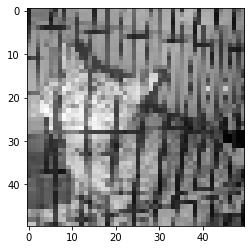

In [61]:
import torch
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
#convert numpy to tensor
X = X/255.0
#normalizing the pixel values
y = torch.Tensor([i[1] for i in training_data])

#One image example
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap="gray")
print(y[0])

Alright! So now we have our training data in the form of inputs and outputs.

Now, we're going to build the CNN. We'll begin with some basic imports:
Next, we'll make a Net class again, this time having the layers be convolutional.

The layers have 1 more parameter after the input and output size, which is the kernel window size. This is the size of the "window" that you take of pixels. A 5 means we're doing a sliding 5x5 window for colvolutions.

The same rules apply, where you see the first layer takes in 1 image, outputs 32 convolutions, then the next is going to take in 32 convolutions/features, and output 64 more...and so on.

Now comes a new concept. Convolutional features are just that, they're convolutions, maybe max-pooled convolutions, but they aren't flat. We need to flatten them, like we need to flatten an image before passing it through a regular layer.

Initially image size, WxH = 50x50
Kernel Size, k = 5
Stride , s = 1
Padding, P = 0

No. of outputs/pixels to next layer of conv2d is O = {(W-k+2*P)/s} + 1
Then we apply maxpool of size(2,2) which reduces the size by half across both dimensions of the image, hence new output size O = O/2

At the last conv2d later, the input size to the linear layer is the image volume flattened out, hence it would be last O*O*last channel width

The input image is 50 * 50, so:
O1 = (50-5+2*0)/1 + 1=46
O1 max pooling = (46)/2 = 23
O2 = (23-5+2*0)/1 + 1 = 19
O2 max pooling = (19)/2 = 8.5, crops out the half pixel, hence = 8
O3 = (8-5+2*0)/1 + 1 = 4
O3 max pooling = 4/2 = 2

Last volume is 2* 2*Channelwidthoutput,128 = 512


In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(2*2*128, 512) #flattening
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        x = x.view(-1, 512)  # .view is reshape, this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1) 

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [63]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss() 

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0 
y = torch.Tensor([i[1] for i in training_data])

Above, we're separating out the featuresets (X) and labels (y) from the training data. Then, we're viewing the X data as (-1, 50, 50), where the 50 is coming from image size. Now, we want to separate out some of the data for validation/out of sample testing.

To do this, let's just say we want to use 10% of the data for testing. We can achieve this by doing:
We're converting to an int because we're going to use this number to slice our data into groups, so it needs to be a valid index:


In [64]:
VAL_PCT = 0.1  # lets reserve last 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

len(train_X), len(test_X)

2494


(22452, 2494)

Finally, we want to actually iterate over this data to fit and test. We need to decide on a batch size. If you get any memory errors, go ahead and lower the batch size. I am going to go with 100 for now:

Then lets print a str to see visualize our slicing of the batches of data



In [65]:
BATCH_SIZE = 100 
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in range(0, len(train_X), BATCH_SIZE): 
    #so we start from 0 to the end of the len of the data set, and the step size is the batch size
        print(f"{i}:{i+BATCH_SIZE}")

0:100
100:200
200:300
300:400
400:500
500:600
600:700
700:800
800:900
900:1000
1000:1100
1100:1200
1200:1300
1300:1400
1400:1500
1500:1600
1600:1700
1700:1800
1800:1900
1900:2000
2000:2100
2100:2200
2200:2300
2300:2400
2400:2500
2500:2600
2600:2700
2700:2800
2800:2900
2900:3000
3000:3100
3100:3200
3200:3300
3300:3400
3400:3500
3500:3600
3600:3700
3700:3800
3800:3900
3900:4000
4000:4100
4100:4200
4200:4300
4300:4400
4400:4500
4500:4600
4600:4700
4700:4800
4800:4900
4900:5000
5000:5100
5100:5200
5200:5300
5300:5400
5400:5500
5500:5600
5600:5700
5700:5800
5800:5900
5900:6000
6000:6100
6100:6200
6200:6300
6300:6400
6400:6500
6500:6600
6600:6700
6700:6800
6800:6900
6900:7000
7000:7100
7100:7200
7200:7300
7300:7400
7400:7500
7500:7600
7600:7700
7700:7800
7800:7900
7900:8000
8000:8100
8100:8200
8200:8300
8300:8400
8400:8500
8500:8600
8600:8700
8700:8800
8800:8900
8900:9000
9000:9100
9100:9200
9200:9300
9300:9400
9400:9500
9500:9600
9600:9700
9700:9800
9800:9900
9900:10000
10000:10100
10100:10

In [66]:
BATCH_SIZE = 100
EPOCHS = 3

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): 
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50) #then, reshape too
        batch_y = train_y[i:i+BATCH_SIZE]
        
        #as usual first 0 the gradient for each batch
        net.zero_grad()
        
        #optimizer.zero_grad()
        #take note in some nn, there may be 2> same optimizers, so we might want to be apply 0_grad to specific optimizer
        #or to the whole newtwork
        
        outputs = net(batch_X)
        #gives us our output after running through our CNN
        
        loss = loss_function(outputs, batch_y)
        loss.backward()
        #loss function applied, then back propagate
        
        optimizer.step()
        #does the update

    print(f"Epoch: {epoch}, Loss: {loss}")

  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.21088474988937378


  0%|          | 0/225 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.1450960785150528


100%|██████████| 225/225 [01:05<00:00,  3.43it/s]

Epoch: 2, Loss: 0.13346624374389648


In [67]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i]) #return the index of the testing set y label
        
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  
        predicted_class = torch.argmax(net_out)
        
        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy:", round(correct/total, 3))

100%|██████████| 2494/2494 [00:04<00:00, 505.39it/s]

Accuracy: 0.776


After 3 EPOCHes, running the data throught the network, the accuracy is 0.776. That said, as we continue to do testing and learn new things about how to measure performance of models, when to stop training...etc, it's going to be muuuuuuch more comfortable if we're using GPUs.

In [68]:
torch.cuda.is_available()

True

Now we're ready to decide what we want to do on the GPU. We know at the very least we want our model and its calculations to be done on the GPU. If your model is on the GPU, this means, in order to pass data through it, we also want our data on the GPU. Thus, we want not only the model, but also the training data (if it can be fit), all on the GPU.

To start, we can put our network on our GPU. To do this, we can just set a flag like:

In [69]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

Often, however, we want to write code that allows for a variety of people to use our code, including those who may not have a GPU available. To handle for this, we can use the above torch.cuda.is_available() and do:

In [70]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  
    # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


Again, to write code that can logically use what's available to dispense the workload across the numerous GPUs, you can get how many GPUs are available by doing:

In [71]:
torch.cuda.device_count()

1

From here, we could extrapolate out index numbers and assign specific layers to specific GPUs.

For now, we're writing code that really just needs either one GPU or CPU, so we'll just use a single device. Now that we have figured out the best device to use, we can start setting things to that device. For example, setting our neural network to that device is as easy as:

In [72]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

We alread had our net defined above, but, usually you'd just immediately define and send it to the device, like:

```python
net = Net().to(device)
```
Now we can go to train, but this time, let's put our batches on the GPU. In this example, we could actually have put all of our data on the GPU, since it's not a huge dataset. This would save with some IO time moving things from RAM to VRAM, But this wont be a very common, so I'd rather just show the way you're going to normally have to most likely do it.

I am going to copy the above train function and then make really just one quick modification, which is, after we've defined our batches, we can move them to the GPU by doing: batch_X, batch_y = batch_X.to(device), batch_y.to(device). Also we need to shift the optimizer and the batch_size too

In [73]:
EPOCHS = 3

def train(net):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    BATCH_SIZE = 100
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            net.zero_grad()

            optimizer.zero_grad()  
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()  

        print(f"Epoch: {epoch}. Loss: {loss}")

train(net)

  3%|▎         | 6/225 [00:00<00:03, 58.43it/s]

Epoch: 0. Loss: 0.11765135824680328


  3%|▎         | 6/225 [00:00<00:03, 56.76it/s]

Epoch: 1. Loss: 0.11332621425390244


100%|██████████| 225/225 [00:04<00:00, 51.24it/s]

Epoch: 2. Loss: 0.0875396579504013


As you can see by running times, this is much faster. Now we can also test on either the GPU or CPU. Since we're testing on quite a few samples, we can also do this on the GPU:


In [74]:
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]  
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1

    print("Accuracy: ", round(correct/total, 3))

test(net)

100%|██████████| 2494/2494 [00:05<00:00, 476.62it/s]

Accuracy:  0.78


# Basic Network Analysis and Visualizations
One of the main questions that we have at the moment is: How many epochs should we do? When will we know when to stop training?

We've determined that this model does learn, but also, how might we determine if some other model that we think of is better or worse?

With larger datasets and models that can take days/weeks/months to train, we want to know how to evaluate them in shorter periods of time to determine if we should keep training.

To begin, we'll, at the very least, want to start calculating accuracy, and loss, at the epoch (or even more granular) level.

Not only this, but we'll want to calculate two accuracies:

In-sample accuracy: This is the accuracy on the data we're actually feeding through the model for training. This is the data that we're "fitting" against.

Out-of-sample accuracy: This is the accuracy on data that we've set aside that the model will never see/fit against.

In general, we expect in-sample accuracy to be higher than out-of-sample accuracy. You may also hear "out of sample" accuracy referred to as "validation accuracy." While we expect validation/out-of-sample accuracy to be a bit worse than the in-sample accuracy, we want to track that delta. Something like 5-10% accuracy difference is pretty common, but as this delta grows, it usually signals to us that our model is beginning to "overfit" (the neural network is just memorizing the data and changing weights to work only for the training data, rather than generally understanding the data).

You can also track in and out of sample loss. You will often be able to spot both losses decline to a point, and then out of sample loss begins to arc and curve back upwards. This is usually a sign that you've gotten the most out of your model's training.

We can see this in practice with our current dataset most likely, so let's start to work on our code to handle for this. Our code up to this point is:

```python
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(2*2*128, 512) 
        self.fc2 = nn.Linear(512, 2) 

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        x = x.view(-1, 512)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1) 

if torch.cuda.is_available():
    device = torch.device("cuda:0") 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

net = Net().to(device)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle=True)

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
        print(loss)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_X[i].view(-1, 1, 50, 50).to(device))[0]

            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy:", round(correct/total,3))
    ```

With the above code, we can train and then test our network, but not quite to the degree that we want. Let's start by defining a fwd pass function of what happens when we pass any data

The only thing we want to check for is to see if we are training the model or not. We definitely do not want to modify weights when we do our validation data, for example. 

For this reason, I am going to default train to be False. 

In [75]:
def fwd_pass(X, y, train=False):

    if train: #if true
        net.zero_grad()
        
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def test(size):
    random_start = np.random.randint(len(test_X)-size)
    X,y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device),y.to(device))
    return val_acc, val_loss

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 3
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            acc, loss = fwd_pass(batch_X, batch_y, train=True)

            print(f"Acc: {round(float(acc),2)}  Loss: {round(float(loss),4)}")
            #Just to show the above working, 
            #Outprinting this all out every step is going to get a bit absurd, every batch in each epoch, that is alot 
            if i == 5:
                break
            break

train(net)
test(size=1000)

  0%|          | 0/225 [00:00<?, ?it/s]


Acc: 0.57  Loss: 0.2492
Acc: 0.57  Loss: 0.2471
Acc: 0.57  Loss: 0.2456


(0.507, tensor(0.2514, device='cuda:0'))

SInce outprinting is crazy. Instead, let's just save it to some log file then we can print all onto the file

time.time() The time() function returns the number of seconds passed since epoch. For Unix system, January 1, 1970, 00:00:00 at UTC is epoch (the point where time begins).Dec 28, 2018. Using this to name our file.

In addition, now we want to test and validate very 50 steps during the training by using the test

In [78]:
import time

MODEL_NAME = f"model-{int(time.time())}"  
# gives a dynamic model name, to just help with things getting messy over time. 
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):

    if train: #if true
        net.zero_grad()
        
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

def test(size=''):
    random_start = np.random.randint(len(test_X)-size)
    X,y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device),y.to(device))
    return val_acc, val_loss

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 10

    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

train(net)

100%|██████████| 225/225 [00:24<00:00,  9.16it/s]


To start, I am just going to use Matplotlib. Later you could get fancy and use something like Dash, or even just Pygal, or something else entirely. Heck, if you want, check out tensorboardx! That's the fun thing about Pytorch. It's Pythonic and open. You can do whatever you want. No one is forcing you into anything! I am showing you one of many ways for you to do a thing.

Now we could graph:

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

model_name = MODEL_NAME 

def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []
    
    contents = contents.remove(" ")
    for c in contents:
        if model_name in c: #incase there are mutiple model in the same file
            name, timestamp, acc, loss, val_acc, val_loss = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))
            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))


    fig = plt.figure() #multiple figures, or if just 2 data, then normal plt.plot(x,y), plt.show()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)

    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    
    plt.show()

create_acc_loss_graph(model_name)

NameError: name 'MODEL_NAME' is not defined

Alright so clearly it was more like 4-5 epochs (each epoch is ~25 seconds atm, and our X axis is time) before things started to go sour. So now we know, at least with our current model/settings, that somewhere between 4 and 5 epochs is all we want to train for. We can see how bad things already are getting by 8-10 epochs. Validation accuracy doesn't seem to suffer much, interestingly enough, but we'd still probably want to stop far before this.

Hopefully this has helped you to visualize neural networks learning, and the main stats that you want to track. Also, you can see just how well neural networks can generalize initially, but later overfit and just memorize the data later on. You can see that we're getting 100% accuracy on some of those batches, and, over time, that deviation from 100% accuracy is shrinking. If we keep training for more and more epochs, this model will eventually most likely reach a perfect 100% accuracy on in-sample data.

## Full Code

```python
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

REBUILD_DATA = False # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]]) 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(2*2*128, 512) 
        self.fc2 = nn.Linear(512, 2) 

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        x = x.view(-1, 512)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1) 

if torch.cuda.is_available():
    device = torch.device("cuda:0") 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle=True)

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

MODEL_NAME = f"model-{int(time.time())}"  
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

def fwd_pass(X, y, train=False):

    if train: #if true
        net.zero_grad()
        
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

def test(size=''):
    random_start = np.random.randint(len(test_X)-size)
    X,y = test_X[random_start:random_start+size], test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device),y.to(device))
    return val_acc, val_loss

def train(net):
    BATCH_SIZE = 100
    EPOCHS = 10

    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

train(net)
```